# Feature Selection

In [ ]:
Feature Selection is a way of selecting the subset of most relevent features from original features, 
also we try to remove less relevent features, noisy features.

# Need of Feature Selection

In [ ]:
1. Less Important features
2. Noisy features

# Benifits of Feature Selection

In [ ]:
1. It improves accuracy
2. It takes less computation time(It reduces training and testing time)
3. It helps to reduce overfitting.
4. It helps in avoiding curse of dimensionality.

# Feature Selection Techniques

In [ ]:
1. Filter Method:(Before Training)
    1. Correlation:-
        1. Pearson Correlation Coeff. (Cont vs cont)
        2. Spearman Rank Correlation coeff (Cont vs cont)
        3. Kendall(tau) corr. coeff (cat vs cat)
        
    2. Mutual Information(Information Gain)
    3. fishers Score (Cat)
    4. Chi-Square Test(Cat)
    5. Missing Value Ratio
    6. Variance Threshold Method(Numerical features)
    7. Anova Test
    8. Mean Absolute Difference

2. Wrapper Method:(With training)
    * It uses Machine Learning Algorithms to find best subset of features
    1. Forward Feature Selection
    2. Backward Feature Selection
    3. Recursive Feature Elimination
    4. Exhaustive Feature Selection

3. Embedded Method:(Post training)
    1. Random Forest Important
    2. AdaBoost Importance
    3. Regularization (L1 >> Lasso)

# 1. Filter Method

In [25]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston

In [26]:
boston= load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [28]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
df1 = df.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 1.1 Correlation

### 1.1.1 Pearson Correlation coeff.

In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

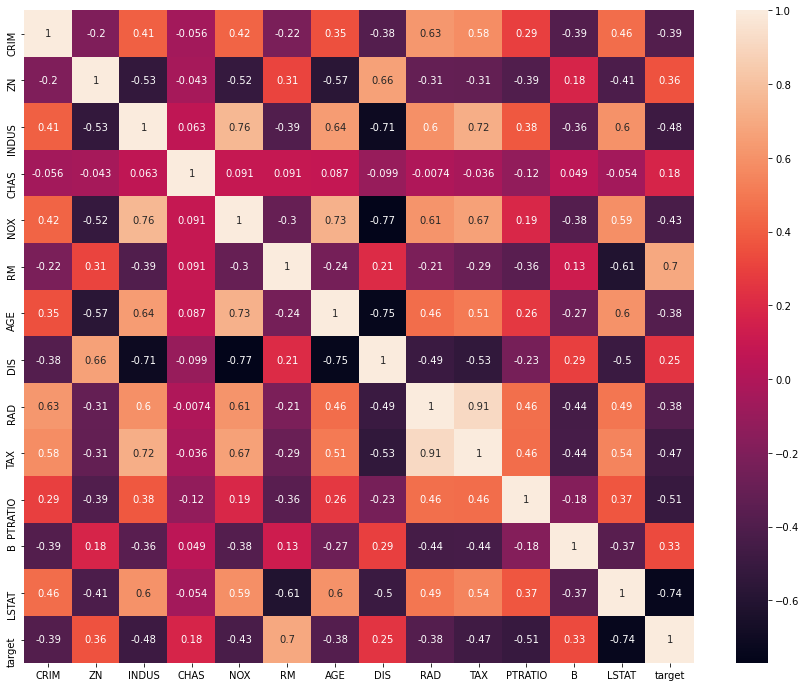

In [14]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [15]:
df.corr(method='pearson')

#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Spearman's Rank Correlation Coeff.

In [16]:
df.corr(method='spearman')

#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.571660,0.735524,0.041537,0.821465,-0.309116,0.704140,-0.744986,0.727807,0.729045,0.465283,-0.360555,0.634760,-0.558891
ZN,-0.571660,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735524,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.041537,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.821465,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.309116,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.704140,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744986,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.727807,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.729045,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


<AxesSubplot:>

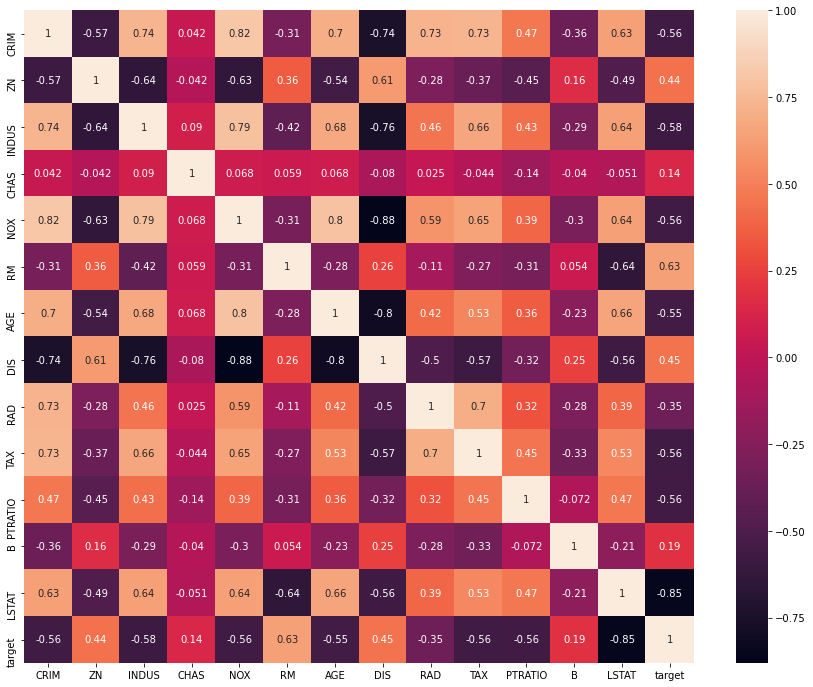

In [17]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(method='spearman'),annot=True)

In [ ]:
It works better when we dont have linear relationship

## Kendall(tau) Rank Corr Coeff

In [ ]:
-Its a non-parametric test that is used to measure the degree of association between two variables
-It is best suited for discrete(categorical)

Kendall is preffered than spearman because of more robustness(Smaller Gross error Sensitivity)(GES)
and more efficient(Smaller Asymptotic variance)(AV)

In [18]:
df.corr(method='kendall')

#     * pearson : standard correlation coefficient
#     * kendall : Kendall Tau correlation coefficient
#     * spearman : Spearman rank correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.462057,0.521014,0.033948,0.603361,-0.211718,0.497297,-0.539878,0.563969,0.544956,0.312768,-0.264378,0.454837,-0.403964
ZN,-0.462057,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521014,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.033948,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.603361,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.211718,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.497297,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539878,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.563969,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544956,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


<AxesSubplot:>

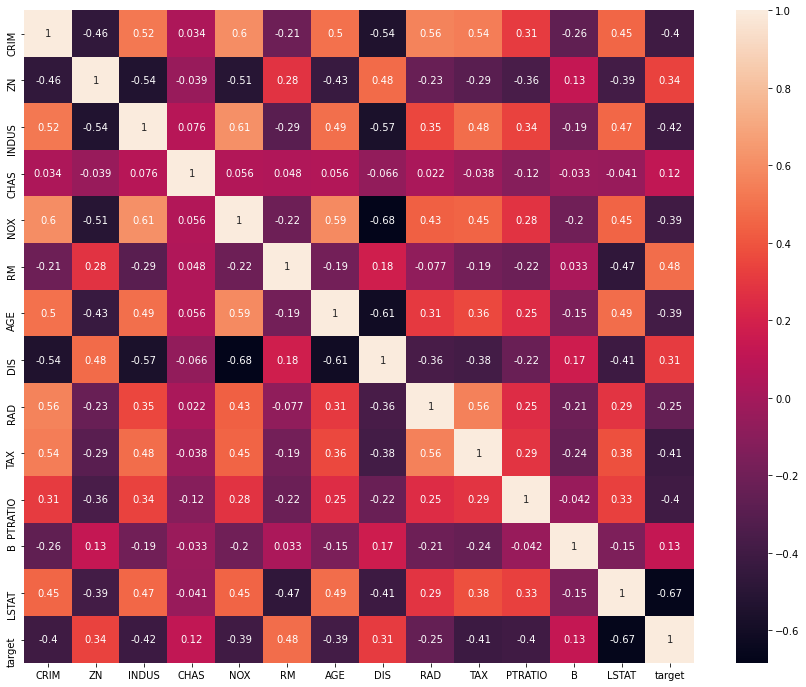

In [19]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(method='kendall'),annot=True)

In [ ]:
Pearson: Variables should be continous
         Should be normally distributed
         relation should be linear
         outliers to be handled
        
Spearman : Works well on ordinal data
           Variables should be continous
           determine strength and direction of monotonic relation
           Works well on monotonic and non-linear
        
Kendall : When data dosent meet pearsons requirements
          Its non parametric, so no need of normally distributed data
          Does not require continous data
          suited for cat var

In [ ]:
cat_var = df.select_dtype(include)

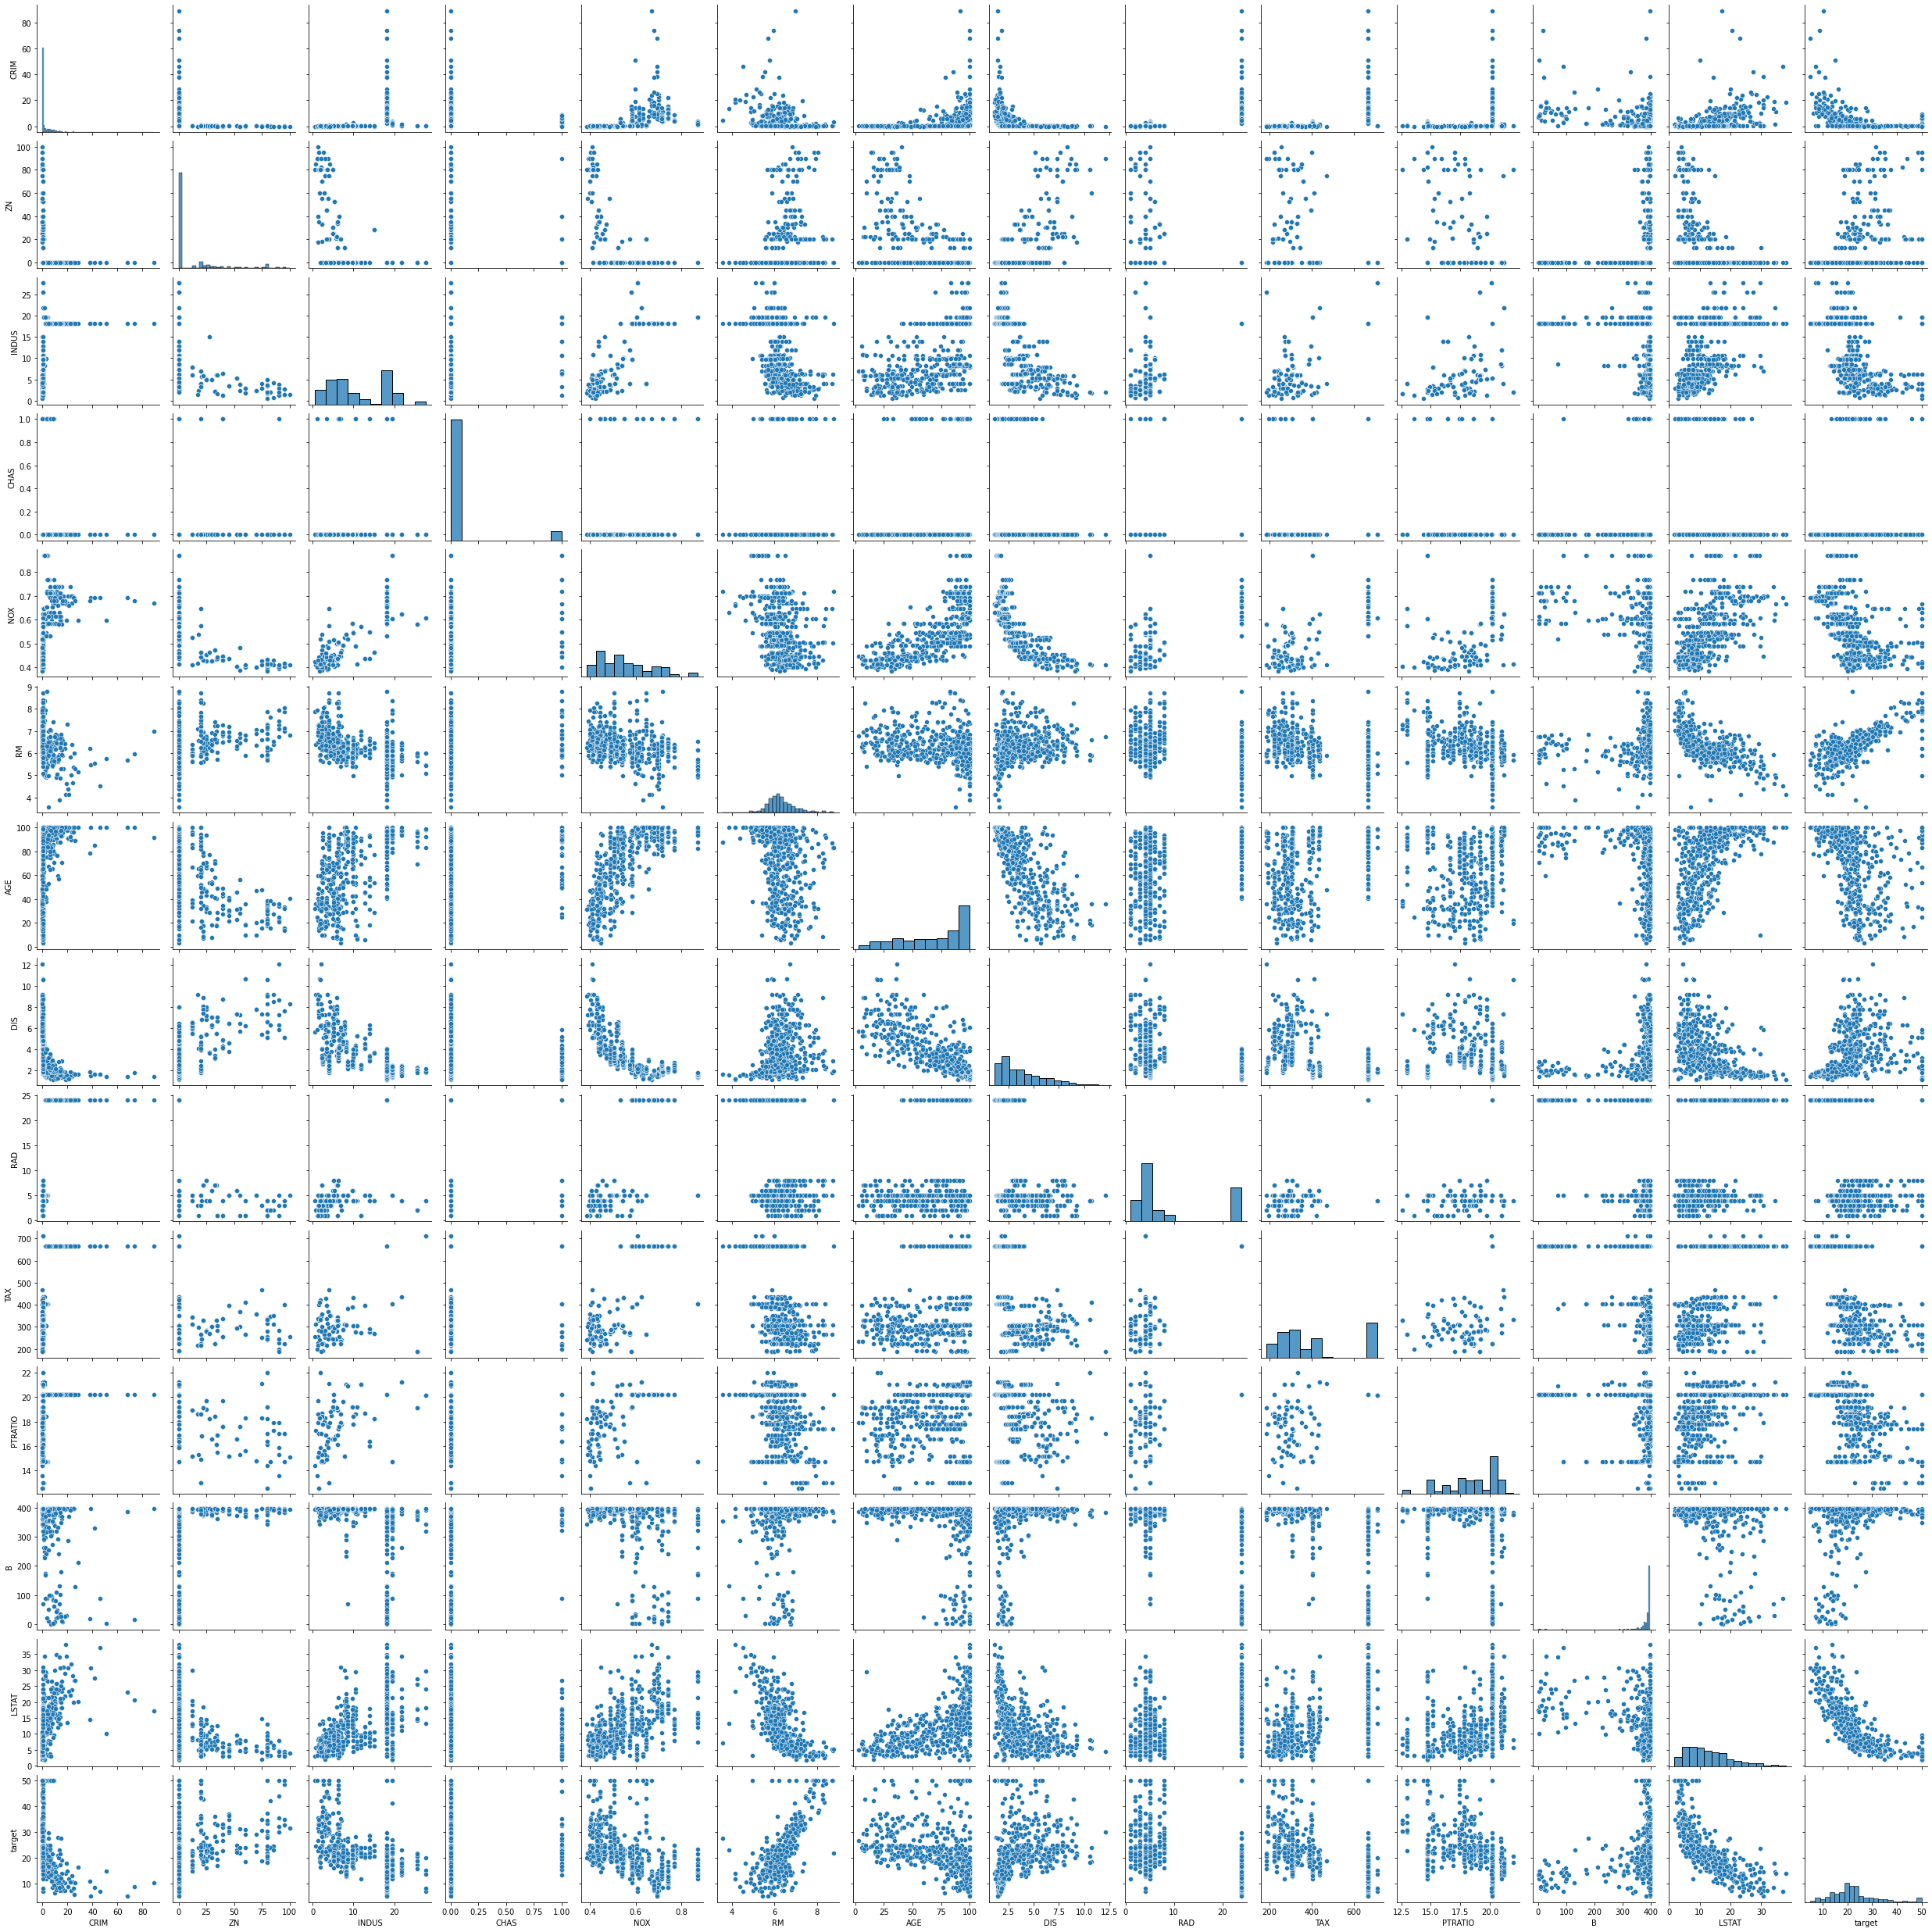

In [20]:
sns.pairplot(df)

## Mutual Information (Information Gain)

In [ ]:
-It measure of dependence or mutual dependence between two variables.
-It ranges from 0 to 1

IG determines the reduction in entropy
Calculating the IG of each feature wrt target variable

In [3]:
df_wine = pd.read_csv('wine.csv')
df_wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

<AxesSubplot:>

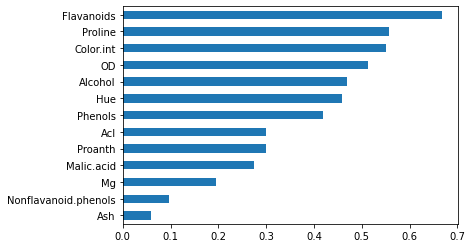

In [5]:
x = df_wine.drop('Wine',axis=1)
y = df_wine['Wine']
array = mutual_info_classif(x,y)
s1 = pd.Series(array, index = x.columns)
s1.sort_values(ascending=True).plot(kind='barh')

## Fisher Score

In [ ]:
It return a rank of variables of fishers score
It works only on categorical data
It will be more accurate on small samples

In [ ]:
# pip install skfeature
# pip install skfeature-chappers

In [6]:
from skfeature.function.similarity_based import fisher_score

In [10]:
array = fisher_score.fisher_score(x.values, y)
array

array([ 6,  0,  1, 12,  3,  2,  7, 11,  9,  4,  5, 10,  8])

<AxesSubplot:>

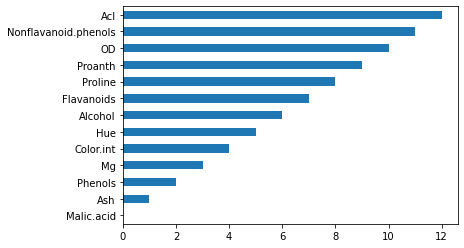

In [11]:
s1 = pd.Series(array, index = x.columns)
s1.sort_values(ascending=True).plot(kind='barh')

## Chi-2 Test

In [ ]:
It works only on categorical data
Suited for nominal data
cat vs cat

1. chi2 Goodness of fit : Determines if sample data matches with population   
2. chi2 test for independence :
    
chi2 is high:
    1. feature is important
    2. p_val is low
    
chi2 is low :
    1. feature is not important
    2. p_val will be high

In [ ]:
h0 : Two var are independent
ha: two var are dependent
p_val > 0.05 >> h0 is true
p_val <= 0.05 >> ha is true

In [12]:
from sklearn.feature_selection import chi2, SelectKBest

In [15]:
best_features = SelectKBest(chi2, k = 8)
best_features.fit(x, y)
best_features.scores_
best_features.pvalues_df

array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
       1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
       9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
       0.00000000e+00])

In [21]:
df = pd.DataFrame({'features': x.columns, 'chi2':best_features.scores_ ,'pval':np.around(best_features.pvalues_,3)})
df.sort_values('chi2')

,features,chi2,pval
2,Ash,0.743381,0.690
7,Nonflavanoid.phenols,1.815485,0.403
10,Hue,5.182540,0.075
0,Alcohol,5.445499,0.066
8,Proanth,9.368283,0.009
5,Phenols,15.623076,0.000
11,OD,23.389883,0.000
1,Malic.acid,28.068605,0.000
3,Acl,29.383695,0.000
4,Mg,45.026381,0.000


In [23]:
chi_sqr, pval = chi2(x,y)
df_chi = pd.DataFrame({'features': x.columns, 'chi2':chi_sqr ,'pval':np.around(pval,3)})
df_chi.sort_values('chi2')

,features,chi2,pval
2,Ash,0.743381,0.690
7,Nonflavanoid.phenols,1.815485,0.403
10,Hue,5.182540,0.075
0,Alcohol,5.445499,0.066
8,Proanth,9.368283,0.009
5,Phenols,15.623076,0.000
11,OD,23.389883,0.000
1,Malic.acid,28.068605,0.000
3,Acl,29.383695,0.000
4,Mg,45.026381,0.000


## Missing Value Ratio

In [32]:
titanic = pd.read_csv('titanic.csv')

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
titanic.isna().mean() *100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [35]:
a = titanic.isna().sum()/ len(titanic)*100
a

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [38]:
features = titanic.columns
features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [41]:
variable = []
for i in range(titanic.columns.shape[0]):
#     print(i)
    if a[i] <= 15:
        variable.append(features[i])
        
variable

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Gender',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [42]:
new = titanic[variable]
new

,PassengerId,Survived,Pclass,Name,Gender,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


## Variance Threshold Method

In [ ]:
Works only with Numerical Features
Looks for variability in the features

Assumption: Higher variance may contain more useful information
    - remover numerical features with low variance
    
if var thresh = 0 >> remove constant features
if var thresh > 0 >> remove Quasi-constant feature

In [2]:
import numpy as np

In [ ]:
df['test'] = 1

In [3]:
a= np.array([1,5,71,45])
np.var(a)

842.75

In [5]:
a= np.array([1,1,1]) # Constant values
np.var(a)

0.0

In [6]:
a= np.array([1,2,1,2]) # # Quasi-Constant values
np.var(a)

0.25

In [50]:
df_wine['Test1'] = 1000
df_wine['Test2'] = 1
df_wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Test1,Test2
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1000,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1000,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1000,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1000,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1000,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1000,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1000,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1000,1


In [48]:
df_wine['Proline'].var()

99166.71735542428

In [46]:
df_wine['Test1'].var()

0.0

In [51]:
from sklearn.feature_selection import VarianceThreshold
var_theshold = VarianceThreshold(threshold=0.0)
var_theshold.fit(df_wine)
var_theshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [54]:
var_theshold = VarianceThreshold(threshold=1)
var_theshold.fit(df_wine)
var_theshold.get_support()

array([False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False,  True, False, False])

In [55]:
df_wine.columns[var_theshold.get_support()]

Index(['Malic.acid', 'Acl', 'Mg', 'Color.int', 'Proline'], dtype='object')

## ANOVA test (Analysis Of Variance)

In [ ]:
Cat vs Num
ANOVA test is a statistical technique developed to study significance of difference of means of more than 2 samples.

In [60]:
from sklearn.feature_selection import f_classif
f_val , pval = f_classif(x,y)
df_anova = pd.DataFrame({'features': x.columns, 'f_val':f_val ,'pval':pval})
df_anova.sort_values('f_val')

,features,f_val,pval
4,Mg,12.429584,8.963395e-06
2,Ash,13.312901,4.149968e-06
7,Nonflavanoid.phenols,27.575417,3.888041e-11
8,Proanth,30.271383,5.125359e-12
3,Acl,35.771637,9.444473e-14
1,Malic.acid,36.943425,4.127229e-14
5,Phenols,93.733010,2.137670e-28
10,Hue,101.316795,5.917662e-30
9,Color.int,120.664018,1.162008e-33
0,Alcohol,135.077624,3.319504e-36


<AxesSubplot:>

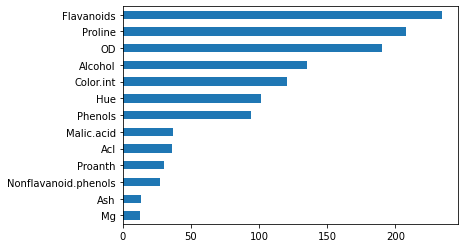

In [59]:
f_val , pval = f_classif(x,y)
s1 = pd.Series(f_val, index = x.columns)
s1.sort_values(ascending= True).plot(kind='barh')